# Quantum Walks & Modified Distributions
**Purpose :** Implement Galton board variants that target different distributions (exponential) and implement Hadamard quantum walk. Verify distributions and compute metrics vs analytic targets.

## Background & references
- Reference : *Universal Statistical Simulator* (arXiv:2202.01735) ([link](https://arxiv.org/abs/2202.01735)) — key ideas for quantum Galton boards and quantum walks.
- Short summary : the Galton board can be implemented as a sequence of conditional swaps (quantum pegs) that approximates binomial/Gaussian statistics; variations and coin operations yield exponential or walk distributions.

## Objectives
1. Implement the Hadamard quantum walk (position register + coin).
2. Implement a configurable exponential sampler (noiseless all-to-all sampler).
3. Verify distributions, compute TV/KL/fidelity vs analytic target.
4. Plot results (counts, grouped visualisations) and compute variance comparisons for quantum vs classical walks.

In [ ]:
#Cell 1 : Installation
# Core Qiskit Terra + Aer
!pip install qiskit==1.3
!pip install qiskit-aer==0.15
!pip install qiskit-ibm-runtime==0.34.0

# Utilities
!pip install matplotlib numpy
!pip install pylatexenc==2.10

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 k

## Exponential sampler
- Implement the noiseless transform that approximates an exponential distribution using controlled-RY rotations or encoded amplitude mapping.
- Provide parameters (lambda, number of qubits) and how they influence shape.
- Compute TV against the analytic exponential distribution and plot.
- The main codes are in `exponential_sampler.py` file. (See `src` on Github repo)

In [ ]:
import math
from exponential_sampler import run_exponential, build_exponential_circuit
from utils import total_variation, kl_divergence, bhattacharyya_fidelity
from math import comb

n_bins = 8
lam = 0.8
shots = 5000
counts = run_exponential(n_bins, lam, shots=shots, seed=42)

# analytic expected:
probs = [math.exp(-lam*i) for i in range(n_bins)]
Z = sum(probs)
expected_counts = [shots * p / Z for p in probs]

tv = total_variation(list(counts.values()), expected_counts)
kl = kl_divergence(list(counts.values()), expected_counts)
fid = bhattacharyya_fidelity(list(counts.values()), expected_counts)
print("TV, KL, fidelity:", tv, kl, fid)

TV, KL, fidelity: 0.013313642588917275 0.0011464597722475826 0.9997080078077959


## Hadamard quantum walk implementation
- Describe the walker register, coin qubit, initialization at center, coin flip (Hadamard), and shift operations (conditional).
- Explain how to map the measured bitstrings to walker positions.
- Compute mean and variance; show (for quantum walk) quadratic spread vs classical linear spread (plot or table).

In [ ]:
# Hadamard Walk Verification

from hadamard_walk import run_hadamard_walk
import numpy as np

steps = 8
shots = 5000
counts = run_hadamard_walk(steps, shots=shots, seed=42)
bins = np.array(list(sorted(counts.keys())))
vals = np.array([counts[i] for i in bins], dtype=float)
probs = vals / vals.sum()
mean = (bins * probs).sum()
var = ((bins - mean) ** 2 * probs).sum()

var_classical = steps / 4.0
print("quantum var:", var, "classical var", var_classical, "ratio:", var / var_classical)

quantum var: 2.1516786559846057 classical var 2.0 ratio: 1.0758393279923029


## Results & discussion
- Present plots for Hadamard walk and exponential sampler with metrics.
- Discuss how these alternative targets help validate the Galton engine’s versatility and their potential application areas (e.g., importance sampling).

Exponential TV: 0.013705499458482356


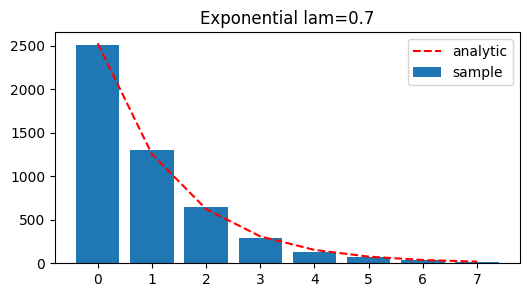

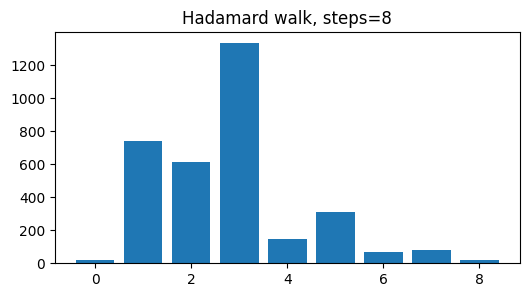

Hadamard walk mean, var: 2.766495932509792 2.174159188820455 classical var: 2.0


In [ ]:
# Demo cell: exponential + hadamard walk
import numpy as np, math
from exponential_sampler import run_exponential
from hadamard_walk import run_hadamard_walk
from utils import total_variation, kl_divergence, bhattacharyya_fidelity
import matplotlib.pyplot as plt

# Exponential demo
n_bins = 8; lam = 0.7; shots = 5000
counts_exp = run_exponential(n_bins, lam, shots=shots, seed=42)
probs = [math.exp(-lam*i) for i in range(n_bins)]; Z=sum(probs)
expected = [shots * p / Z for p in probs]
tv = total_variation(list(counts_exp.values()), expected)
print("Exponential TV:", tv)
plt.figure(figsize=(6,3))
plt.bar(range(n_bins), [counts_exp[i] for i in range(n_bins)], label='sample')
plt.plot(range(n_bins), expected, 'r--', label='analytic')
plt.legend(); plt.title(f"Exponential lam={lam}"); plt.show()

# Hadamard walk demo
steps = 8
counts_hw = run_hadamard_walk(steps, shots=5000, seed=7)
bins = np.array(sorted(counts_hw.keys()))
vals = np.array([counts_hw[i] for i in bins])
plt.figure(figsize=(6,3))
plt.bar(bins, vals); plt.title(f"Hadamard walk, steps={steps}"); plt.show()

# variance check
probs = vals / vals.sum()
mean = (bins*probs).sum()
var = ((bins-mean)**2 * probs).sum()
print("Hadamard walk mean, var:", mean, var, "classical var:", steps/4)